In [60]:
import sklearn as sk
import numpy as np
import pandas as pd
import rasterio, os, napari
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import functools

In [61]:
with open(r"testing_data\checkpoints\data.npy", "rb") as file:
    data = np.load(file)
with open(r"testing_data_2\checkpoints\data.npy", "rb") as file:
    data_2 = np.load(file)

In [62]:
with open(r"testing_data\checkpoints\labels.npy", "rb") as file:
    labels = np.load(file)
with open(r"testing_data_2\checkpoints\labels.npy", "rb") as file:
    labels_2 = np.load(file)

In [63]:
import json

In [19]:
len(data)

45

In [64]:
data_2.shape

(373731, 16)

In [65]:
labels.shape

(407001,)

In [ ]:
labels

In [68]:
labels = pd.Series(labels).replace('non_urbn','non_urban').replace('non urban','non_urban').replace('Shapes','urban').replace('urban [1]', 'urban')
labels.value_counts()

non_urban    209618
urban        197383
dtype: int64

In [79]:
labels = labels.replace('non_urban','temp')
labels = labels.replace('urban','temp_2')
labels = labels.replace('temp','urban')
labels = labels.replace('temp_2','non_urban') 

In [80]:
labels.value_counts()

urban        209618
non_urban    197383
dtype: int64

In [76]:
labels.value_counts()

non_urban    209618
urban        197383
dtype: int64

In [37]:
pd.Series(labels_2).value_counts()

non_urban    219730
urban        154001
dtype: int64

### Training Random Forest Classifier

In [81]:
 X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.2)

In [82]:
y_train

328776        urban
6324          urban
363427        urban
186217        urban
256884    non_urban
            ...    
205768        urban
182482        urban
232773    non_urban
92128     non_urban
159917        urban
Length: 325600, dtype: object

In [51]:
a = pd.Series(y_train).value_counts()
b = pd.Series(y_test).value_counts()

print(a)
print("\n")
print(b)

non_urban    167837
urban        157763
dtype: int64


non_urban    41781
urban        39620
dtype: int64


In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [133]:
scores_depth = []
for i in range(1,50):
    fclf = RandomForestClassifier(max_depth=i, n_estimators=10, max_features=1)
    fclf.fit(X_train, y_train)
    scores_depth.append(fclf.score(X_test, y_test))

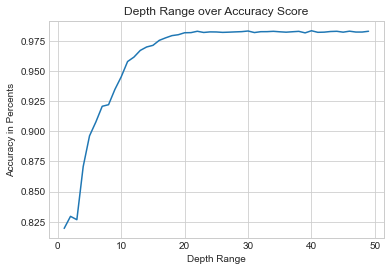

In [134]:
plt.plot(range(1,50), scores_depth)
plt.title("Depth Range over Accuracy Score")
plt.xlabel("Depth Range")
plt.ylabel("Accuracy in Percents");

In [892]:
max_score = max(scores_estimators)
scores_estimators.index(max_score)
max_depth = scores_estimators.index(max_score)
max_depth += 1
max_depth

25

### Full Parameter tuning

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import pandas as pd

### end of testing 

In [137]:
scores_estimators = []
for i in range(1,30):
    fclf = RandomForestClassifier(max_depth= max_depth, n_estimators=i, max_features=1)
    fclf.fit(data, labels)
    scores_estimators.append(fclf.score(data, labels))

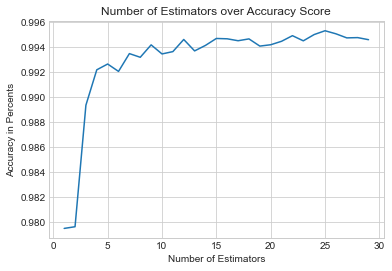

In [138]:
plt.plot(range(1,30), scores_estimators)
plt.title("Number of Estimators over Accuracy Score")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy in Percents");

In [161]:
max_score = max(scores_estimators)
max_estimators = scores_estimators.index(max_score)
max_estimators += 1
max_estimators

25

In [147]:
score_features = []
for i in range(1,10):
    fclf = RandomForestClassifier(max_depth = max_depth, n_estimators=max_estimators, max_features=i)
    fclf.fit(X_train, y_train)
    score_features.append(fclf.score(X_test, y_test))

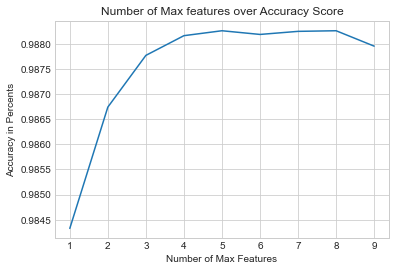

In [148]:
plt.plot(range(1,10), score_features)
plt.title("Number of Max features over Accuracy Score")
plt.xlabel("Number of Max Features")
plt.ylabel("Accuracy in Percents");

In [893]:
max_score = max(score_features)
score_features.index(max_score)
max_features = score_features.index(max_score)
max_features += 1
max_features

5

In [154]:
score_min_samples = []
for i in range(2,10):
    fclf = RandomForestClassifier(max_depth = max_depth, n_estimators=max_estimators, max_features=max_features, min_samples_leaf = i)
    fclf.fit(X_train, y_train)
    score_min_samples.append(fclf.score(X_test, y_test))

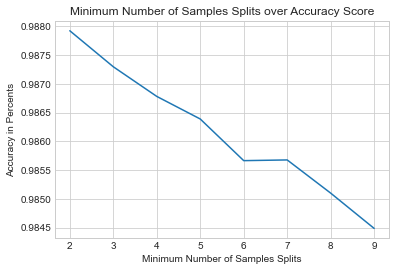

In [155]:
plt.plot(range(2,10), score_min_samples)
plt.title("Minimum Number of Samples Splits over Accuracy Score")
plt.xlabel("Minimum Number of Samples Splits")
plt.ylabel("Accuracy in Percents");

In [165]:
max_score = max(score_min_samples )
score_min_samples.index(max_score)
min_samples = score_min_samples.index(max_score)
min_samples += 2
min_samples

2

In [166]:
fclf = RandomForestClassifier(max_depth = max_depth, n_estimators=max_estimators, max_features=max_features, min_samples_leaf = min_samples)
fclf.fit(X_train, y_train)
fclf.score(X_test, y_test)

0.987948551000602

In [66]:
fclf.score(X_test, y_test)

0.964214198842766

In [895]:
fclf.score(data_2, labels_2)

0.5915270609074441

# Display prediction

In [204]:
from os import listdir
from os.path import isfile, join

In [194]:
test_img = "China_2013-04-10.tif"

In [292]:
full_directory = os.path.join(r"C:\Users\Administrator\DSC_180B\google-eartheingine-labeler\testing_data\full_img")

In [293]:
onlyfiles = [f for f in listdir(full_directory) if isfile(join(full_directory, f))]

In [329]:

img.shape


(16, 89, 189)

In [333]:
model_predictions = []
for i in onlyfiles:
    with rasterio.open('testing_data/full_img/'  + i) as src:
    #     print(src.shape)
        img = src.read()
#     img.flatten(order = 'C')
    
        img_test = np.rollaxis(img.reshape(16,e_dims[1]*e_dims[2]),0,2)

        model_predictions.append(fclf.predict(img_test))

In [289]:
pd.Series(model_predictions[1]).value_counts()

urban        41877
non_urban    39524
dtype: int64

In [229]:
data_classified = pd.DataFrame(model_predictions, index = onlyfiles).swapaxes("index", "columns")

In [247]:
data_classified.iloc[:, 0].value_counts()

urban        41877
non_urban    39524
Name: China_2013-04-10.tif, dtype: int64

In [290]:
np.array(model_predictions).shape

(45, 81401)

In [264]:
len(model_predictions[0])

81401

In [563]:
urban_ratio = []
for i in model_predictions:
    urban_count = 0
    for j in i:
        if j == 'urban':
            urban_count += 1
#     print(urban_count)
    non_urban_count  = len(i) - urban_count
    urban_ratio.append(urban_count/non_urban_count)


In [564]:
import datetime

In [565]:
onlyfiles[0][6:16]
dates = []
for i in onlyfiles:
    dates.append(i[6:16])
# dates

In [566]:
urban_ratio

[0.5107777977366624,
 0.7641321447299423,
 1.280195201301342,
 0.23902474955804362,
 0.22094795673949336,
 0.1210263245584805,
 1.778034682080925,
 1.9745358090185676,
 1.1504730248018409,
 0.9283503381864038,
 0.5975876151581346,
 0.6779052369077306,
 0.16918051018280392,
 0.39651307596513075,
 0.18457746478873238,
 0.034565471431207334,
 0.17064513884055954,
 2.2064430041936713,
 2.0926640926640925,
 14.059086839749328,
 0.4983965793693212,
 0.8377581120943953,
 0.13379617147479106,
 0.3393582291583725,
 0.27066022057712646,
 0.028807339449541284,
 0.1766228315612759,
 0.1377840909090909,
 0.15950920245398773,
 4.527768649359185,
 11.09273903666427,
 1.232382216323822,
 4.863018473335657,
 2.3790678987545197,
 2.4237736617138204,
 2.0123567335243555,
 1.187670698400312,
 0.9923013146985669,
 0.4050283995990645,
 0.42249471458773785,
 0.4557334487234963,
 0.4199729866621644,
 1.5132227700582699,
 2.1809757942511347,
 2.2088897367417015,
 24.143497757847534,
 2.3448001590773515,
 2.057

In [567]:
x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
x_values

[datetime.date(2013, 4, 10),
 datetime.date(2013, 4, 26),
 datetime.date(2013, 5, 12),
 datetime.date(2013, 8, 16),
 datetime.date(2013, 9, 1),
 datetime.date(2013, 10, 3),
 datetime.date(2013, 11, 4),
 datetime.date(2013, 11, 20),
 datetime.date(2013, 12, 22),
 datetime.date(2014, 4, 13),
 datetime.date(2014, 4, 29),
 datetime.date(2014, 5, 15),
 datetime.date(2014, 7, 18),
 datetime.date(2014, 8, 19),
 datetime.date(2014, 9, 4),
 datetime.date(2014, 9, 20),
 datetime.date(2014, 10, 6),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 1, 10),
 datetime.date(2015, 3, 15),
 datetime.date(2015, 4, 16),
 datetime.date(2015, 5, 2),
 datetime.date(2015, 5, 18),
 datetime.date(2015, 6, 3),
 datetime.date(2015, 7, 5),
 datetime.date(2015, 8, 6),
 datetime.date(2015, 8, 22),
 datetime.date(2015, 9, 7),
 datetime.date(2015, 10, 9),
 datetime.date(2015, 11, 26),
 datetime.date(2015, 12, 12),
 datetime.date(2015, 12, 28),
 datetime.date(2016, 1, 13),
 datetime.date(2016, 1, 29),
 datetime.date(

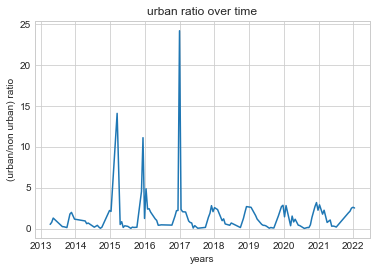

In [867]:
plt.plot(x_values, urban_ratio)
plt.title('urban ratio over time')
plt.xlabel('years')
plt.ylabel('(urban/non urban) ratio')
plt.show()

In [645]:
import numpy as np
import scipy.stats as st

In [654]:
st.t.interval(alpha=0.95, df=len(urban_ratio)-1, loc=np.mean(urban_ratio), scale=st.sem(urban_ratio)) 

(1.0619165923084357, 2.095259364333207)

[datetime.date(2013, 4, 10),
 datetime.date(2013, 4, 26),
 datetime.date(2013, 5, 12),
 datetime.date(2013, 8, 16),
 datetime.date(2013, 9, 1),
 datetime.date(2013, 10, 3),
 datetime.date(2013, 11, 4),
 datetime.date(2013, 11, 20),
 datetime.date(2013, 12, 22),
 datetime.date(2014, 4, 13)]

In [647]:
# len(urban_ratio_corrected)
# urban_ratio_corrected[19]

urban_ratio.index(11.09273903666427)

30

In [570]:
max(urban_ratio_corrected)

3.1749813849590467

In [571]:
# x_values_corrected = x_values.copy()
# for i in bad_index:
#     x_values_corrected.pop(i)

In [572]:
len(x_values_corrected)

110

In [903]:
print(5)

5


In [575]:
year_list = []
for i in x_values:
    year_list.append(i.year)

In [902]:
years = np.unique(year_list)

In [576]:
year_avg = {}
# year_avg.keys = years
for i in years:
    year_avg[i] = []
year_avg

{2013: [],
 2014: [],
 2015: [],
 2016: [],
 2017: [],
 2018: [],
 2019: [],
 2020: [],
 2021: [],
 2022: []}

In [577]:
pd.Series(year_list).value_counts()
# year_avg = { keys = year}
for count, value in enumerate(urban_ratio):
    year_avg[year_list[count]].append(value)

In [578]:
# for i in test_dict.values:
list_year_average = []
for i in year_avg:
    list_year_average.append(np.mean(year_avg[i]))
# list_year_average

In [579]:
list_year_average

[0.8932386322805885,
 0.5961964284060416,
 2.541952400843471,
 3.257714599207024,
 1.249241606661275,
 1.3375268946199286,
 1.0263152629146564,
 1.1877434043813473,
 1.450091265543045,
 2.5116910229645093]

In [580]:
urban_ratio_corrected  = urban_ratio.copy()
bad_index = []
x_values_corrected = x_values.copy()
for i in urban_ratio_corrected:
    if i > 4:
        outlier_index = urban_ratio_corrected.index(i)
        bad_index.append(outlier_index)
count = 0
for i in bad_index:
    urban_ratio_corrected.pop(i - count)
    x_values_corrected.pop(i - count)
    count += 1
bad_index

[19, 29, 30, 32, 45]

In [581]:
print(len(x_values_corrected))
print(len(urban_ratio_corrected))

110
110


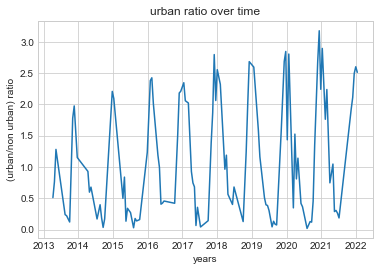

In [868]:
plt.plot(x_values_corrected, urban_ratio_corrected)
plt.title('urban ratio over time')
plt.xlabel('years')
plt.ylabel('(urban/non urban) ratio')
plt.show()

In [907]:
x_values_corrected[-1]

datetime.date(2022, 1, 13)

### Data to days

In [734]:
import datetime

In [738]:
my_date = x_values_corrected[0]
x_datetime = [datetime.datetime(i.year, i.month, i.day).timestamp() for i in x_values_corrected]

In [743]:
x_datetime_start = min(x_datetime)
x_datetime_days = [(x - x_datetime_start)/(60 * 60 * 24) for x in x_datetime]

In [881]:
x_minutes_reshaped = np.array(x_datetime_days).reshape((-1, 1))
# x_minutes_reshaped

### Testing for Linearity

In [753]:
#expirementing with confidence interval
# st.t.interval(alpha=0.95, df=len(urban_ratio_corrected)-1, loc=np.mean(urban_ratio_corrected), scale=st.sem(urban_ratio_corrected)) 
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_minutes_reshaped, urban_ratio_corrected)
reg.score(x_minutes_reshaped, urban_ratio_corrected)

0.05540008335192936

In [754]:
reg.intercept_

0.7142641939421813

In [755]:
reg.coef_

array([0.000236])

In [756]:
reg.coef_ * 365

array([0.08614175])

In [758]:
max(x_datetime_days)

3200.0416666666665

In [767]:
linear_relationship = reg.predict(np.array(x_datetime_days).reshape(-1, 1))
linear_relationship[:10]

array([0.71426419, 0.71804027, 0.72181635, 0.74447281, 0.74824888,
       0.75580104, 0.76336303, 0.7671391 , 0.77469126, 0.80111396])

In [763]:
linear_relationship[:10]

array([0.71426419, 0.71804027, 0.72181635, 0.74447281, 0.74824888,
       0.75580104, 0.76336303, 0.7671391 , 0.77469126, 0.80111396])

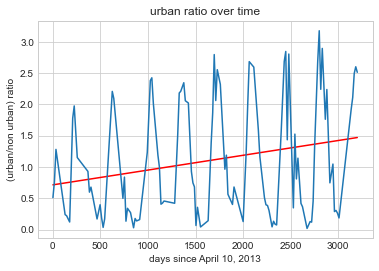

In [880]:
plt.plot(x_datetime_days, linear_relationship, label = "line 1", color = 'red')
plt.plot(x_datetime_days, urban_ratio_corrected)
plt.title('urban ratio over time')
plt.xlabel('days since April 10, 2013')
plt.ylabel('(urban/non urban) ratio')
plt.show()

In [882]:
!conda install --yes seaborn

Solving environment: ...working... done

# All requested packages already installed.



In [886]:
x_series = pd.Series(x_datetime_days, name = 'x_datetime_days')
y_series = pd.Series(urban_ratio_corrected, name = 'urban_ratio_corrected')
df = pd.concat([x_series, y_series], axis=1)

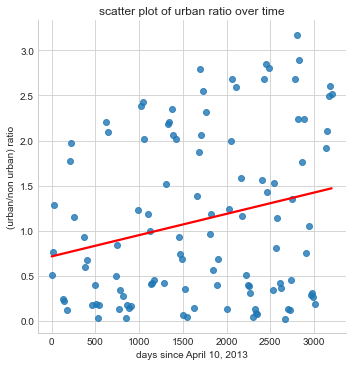

In [887]:
import seaborn as sns

sns.lmplot(x='x_datetime_days', y='urban_ratio_corrected', data = df, fit_reg=True, ci=0, n_boot=1000, line_kws={'color': 'red'})
plt.title('scatter plot of urban ratio over time')
plt.xlabel('days since April 10, 2013')
plt.ylabel('(urban/non urban) ratio')
plt.show()

In [906]:
np.std(y_series)

0.9214641351928792

In [901]:
linear_relationship[-1] - linear_relationship[0]

0.7552251840059682

### Detrending Data

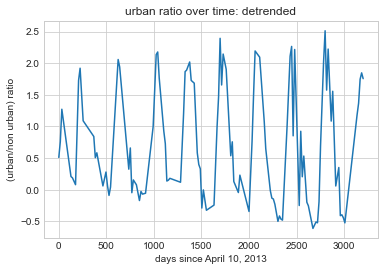

In [878]:
deseasonlized = (urban_ratio_corrected - linear_relationship) + reg.intercept_
plt.plot(x_datetime_days, deseasonlized)
plt.title('urban ratio over time: detrended')
plt.xlabel('days since April 10, 2013')
plt.ylabel('(urban/non urban) ratio')
plt.show()

In [836]:
import numpy as np

In [838]:
x = np.std(urban_ratio_corrected)
x

0.9214641351928792

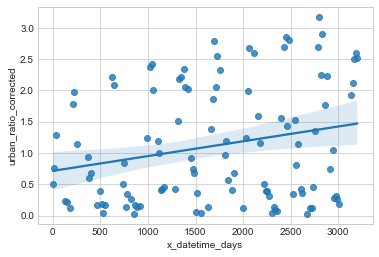

In [823]:
# sns.regplot(x='x_datetime_days', y='urban_ratio_corrected', data = df, ci=95, n_boot=1000)
# plt.show()

In [843]:
# from pandas import read_csv
# from matplotlib import pyplot
# #'x_datetime_days', y='urban_ratio_corrected'
# degree = 18
# coef = polyfit(x_datetime_days, urban_ratio_corrected, degree)
# curve = list()
# for i in range(len(x_datetime_days)):
#     value = coef[-1]
#     for d in range(degree):
#         value += x_datetime_days[i]**(degree-d) * coef[d]
#     curve.append(value)
# # plot curve over original data
# pyplot.plot(urban_ratio_corrected)
# pyplot.plot(curve, color='red', linewidth=3)
# pyplot.show()

### Experimenting with logs

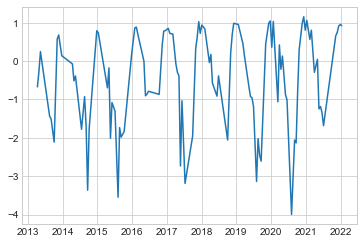

In [667]:
# from math import log
# log_ratios = [log(x) for x in urban_ratio_corrected]
# plt.plot(x_values_corrected, log_ratios)


### Dictionary of Years

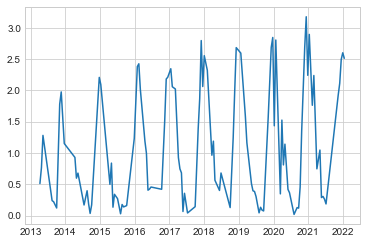

In [661]:
# year_avg_corrected = {}
# # year_avg.keys = years
# for i in years:
#     year_avg_corrected[i] = []
# year_avg_corrected = plt.plot(x_values_corrected, urban_ratio_corrected)

In [611]:
year_list_corrected = []
for i in x_values_corrected:
    year_list_corrected.append(i.year)
len(year_list_corrected)

110

In [612]:
# pd.Series(year_list).value_counts()
# year_avg = { keys = year}
for count, value in enumerate(urban_ratio_corrected):
    year_avg_corrected[year_list_corrected[count]].append(value)

In [619]:
# year_avg_corrected

### Analyzing months, and Seasonality Trend

In [620]:
month_list = []
for i in x_values:
    month_list.append(i.month)
months = np.unique(month_list)

In [621]:
months_avg_corrected = {}
# year_avg.keys = years
for i in months:
    months_avg_corrected[i] = []
months_avg_corrected

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: []}

In [622]:
months_list_corrected = []
for i in x_values_corrected:
    months_list_corrected.append(i.month)
len(months_list_corrected)

110

In [625]:
for count, value in enumerate(urban_ratio_corrected):
    months_avg_corrected[months_list_corrected[count]].append(value)

In [630]:
months_avg_corrected_2 = {}
for i in months_avg_corrected:
    months_avg_corrected_2[i] = np.mean(months_avg_corrected[i])


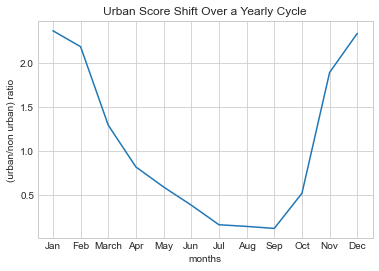

In [890]:
month_names = ['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
year_avg_corrected = plt.plot(month_names,months_avg_corrected_2.values())
plt.title('Urban Score Shift Over a Yearly Cycle')
plt.xlabel('months')
plt.ylabel('(urban/non urban) ratio')
plt.show()

In [850]:
months_avg_corrected_2.values()

dict_values([2.366245525391043, 2.18533166365072, 1.29538425974587, 0.8216970646930098, 0.5947008592301368, 0.3888559803527063, 0.1666984361409275, 0.14788816329694934, 0.1250677733151623, 0.5231472580581815, 1.893641926907705, 2.3363768404108907])

In [848]:
list(range(13))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Averaging corrected data by year

In [559]:
# for i in test_dict.values:
list_year_average_corrected = []
for i in year_avg_corrected:
    list_year_average_corrected.append(np.mean(year_avg_corrected[i]))
# list_year_average

In [561]:
list_year_average_corrected

[0.8932386322805885,
 0.5961964284060416,
 0.5370671896396197,
 1.383457346476262,
 1.249241606661275,
 1.3375268946199286,
 1.0263152629146564,
 1.1877434043813473,
 1.450091265543045,
 2.5116910229645093]

### Accounting for Winter

In [828]:
x_winter = []
winter_index = []
for i in x_values_corrected:
    month = i.month
    if (month == 12 or (1 <=month <= 3)):
        x_winter.append(i)
        winter_index.append(x_values_corrected.index(i))
x_winter
winter_index[:10]

[8, 17, 18, 28, 29, 30, 31, 40, 41, 42]

In [829]:
len(x_winter)

35

In [830]:
winter_urban_ratio = []
for i in winter_index:
    winter_urban_ratio.append(urban_ratio_corrected[i])
winter_urban_ratio[:10]

[1.1504730248018409,
 2.2064430041936713,
 2.0926640926640925,
 1.232382216323822,
 2.3790678987545197,
 2.4237736617138204,
 2.0123567335243555,
 2.2088897367417015,
 2.3448001590773515,
 2.0572519083969465]

In [831]:
len(winter_urban_ratio)

35

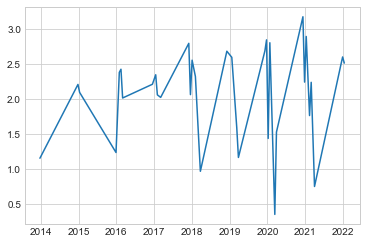

In [832]:
plt.plot(x_winter, winter_urban_ratio)

### Leftover code

### Citations

https://urldefense.proofpoint.com/v2/url?u=https-3A__www.chinadiscovery.com_weather_winter.html-255Cn&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=D1EPOQw7iT2rfi0jWjWTnZkYQh-F5WCqnQ4vW6VmEU8&m=h-EzbZneou0jxq9ByztesEvV9LEbbFBe2tZX4AIr3tISooEAr0-cJx9RF4gkylZS&s=H5BUAE701MEebRHAL1JS-8v3mL2L-Kuk_dtUowptZ2M&e= 
https://urldefense.proofpoint.com/v2/url?u=https-3A__www.degruyter.com_document_doi_10.1515_opag-2D2020-2D0065_html-3Flang-3Den&d=DwIGAg&c=-35OiAkTchMrZOngvJPOeA&r=D1EPOQw7iT2rfi0jWjWTnZkYQh-F5WCqnQ4vW6VmEU8&m=h-EzbZneou0jxq9ByztesEvV9LEbbFBe2tZX4AIr3tISooEAr0-cJx9RF4gkylZS&s=OAes7T51BgzugGhBkYdLUT0orZkPGQONW52xda3guEQ&e= 